In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/Train 2.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
# Remove unnecessary columns
df = df.drop(["ID", "Gender", "Prior_purchases", "Customer_rating"], axis=1)

In [4]:
# Assuming your DataFrame is named df
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Customer_care_calls,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,4,177,44,1233,1,False,False,True,False,False,False,True,False
1,4,216,59,3088,1,False,False,False,True,False,False,True,False
2,2,183,48,3374,1,False,False,False,False,False,False,True,False
3,3,176,10,1177,1,True,False,False,False,False,False,False,True
4,2,184,46,2484,1,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,252,1,1538,1,False,False,False,False,False,True,False,True
10995,4,232,6,1247,0,True,False,False,False,False,True,False,True
10996,5,242,4,1155,0,False,True,False,False,False,True,True,False
10997,5,223,2,1210,0,False,False,False,True,False,True,False,True


In [5]:
# Assuming df_encoded is your one-hot encoded DataFrame
X = df_encoded.drop('Reached.on.Time_Y.N', axis=1)
y = df_encoded['Reached.on.Time_Y.N']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Decision Tree with pruning
dtree = DecisionTreeClassifier(
    criterion='gini',        # Gini impurity
    max_depth=5,             # Limit tree depth (adjust as needed)
    min_samples_split=10,    # Minimum samples to split a node
    min_samples_leaf=5,      # Minimum samples per leaf
    random_state=42
)
dtree.fit(X_train, y_train)

# Predict on test set
y_pred = dtree.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature importances (Gini-based)
importances = pd.Series(dtree.feature_importances_, index=X_train.columns)
print("Feature importances (Gini):")
print(importances.sort_values(ascending=False))

Accuracy: 0.6813636363636364
Feature importances (Gini):
Discount_offered             0.800191
Weight_in_gms                0.139774
Cost_of_the_Product          0.056516
Warehouse_block_B            0.001909
Warehouse_block_F            0.001611
Customer_care_calls          0.000000
Warehouse_block_C            0.000000
Warehouse_block_D            0.000000
Mode_of_Shipment_Road        0.000000
Mode_of_Shipment_Ship        0.000000
Product_importance_low       0.000000
Product_importance_medium    0.000000
dtype: float64


Las dos features mas importantes coinciden con con la matriz de correlación, lo que sugiere que es poco probable que existe una relación no lineal. Esto sugiere que necesitamos datos mas relevantes para predecir nuestra variable objetivo con exactitud. 

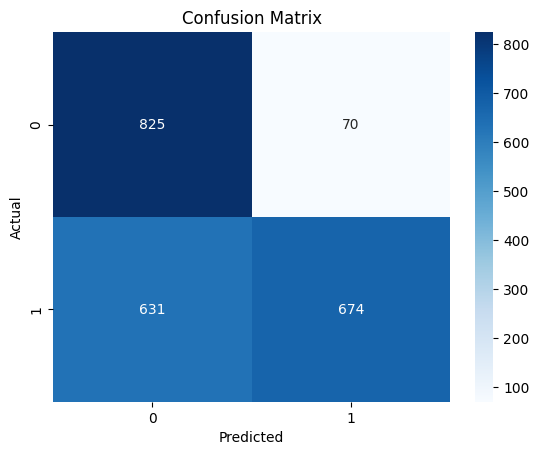

Accuracy: 0.6813636363636364
Confusion Matrix:
 [[825  70]
 [631 674]]
Sensitivity (Recall): 0.5164750957854406


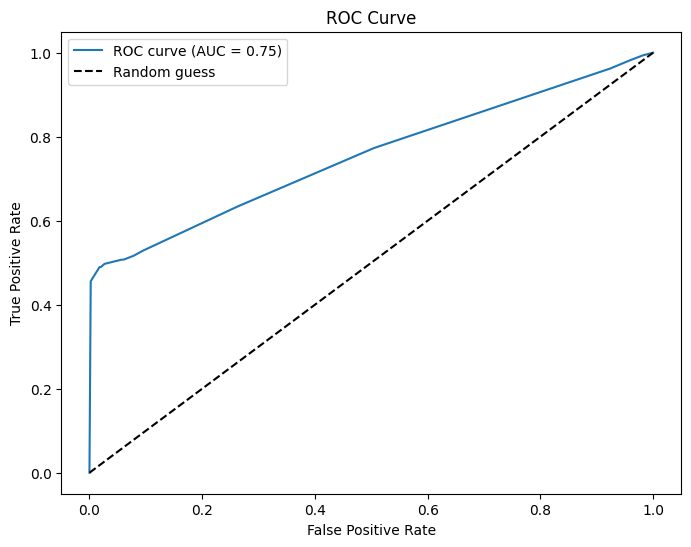

ROC AUC Score: 0.753320918684047


In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", cm)

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred)
print("Sensitivity (Recall):", sensitivity)

# ROC curve and AUC
y_proba = dtree.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("ROC AUC Score:", roc_auc)

## Técnicas posibles para el problema
El objetivo es realizar una clasificación binaria, donde el modelo predice si un pedido llegará a tiempo (1) o no (0). Algunas de las técnicas de machine learning más comunes para este tipo de problema son:
* Árboles de decisión (como el modelo usado).
* Random Forest: ensamble de árboles, más robusto.
* Logistic Regression: simple pero efectivo si hay relación lineal.
* Support Vector Machines (SVM): útil para fronteras complejas.

## Selección del Error (Métrica de Evaluación)

Dado que el objetivo del negocio es identificar proactivamente pedidos que puedan llegar tarde, no basta con ver la exactitud general. En este contexto, lo importante es detectar correctamente los pedidos que llegarán tarde, por lo que la métrica principal será:
* Recall (sensibilidad): mide cuántos de los pedidos que realmente llegaron tarde fueron detectados por el modelo.

Como métricas complementarias se utilizaron:
* Accuracy: porcentaje general de aciertos.
* ROC AUC: mide la capacidad del modelo para diferenciar entre ambas clases.
* Matriz de confusión: para observar errores por tipo.

## Testing y Training

Se dividió el dataset en dos subconjuntos:
* 80% entrenamiento
* 20% prueba (testing)

Esto se realizó usando train_test_split con una semilla (random_state=42) para asegurar reproducibilidad.

## Modelo utilizado
El modelo entrenado fue un árbol de decisión usando sklearn.tree.DecisionTreeClassifier. Se aplicó cierta poda para evitar sobreajuste:
```python
DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
```
Se eliminaron algunas columnas que no aportaban valor (Gender, Prior_purchases, Customer_rating), y se codificaron las variables categóricas usando one-hot encoding (pd.get_dummies con drop_first=True).

## Componente de entrenamiento y ejecución

Todo el proceso de entrenamiento, validación y evaluación fue realizado en Python, utilizando las siguientes herramientas:
* Librerías principales: pandas, scikit-learn, matplotlib, seaborn
* Modelo: DecisionTreeClassifier de sklearn
* Pipeline: limpieza → codificación → división → entrenamiento → predicción → evaluación

## Interpretación de los resultados

Se entrenó un árbol de decisión con parámetros de poda (max_depth=5, min_samples_split=10, min_samples_leaf=5) para evitar sobreajuste. El modelo alcanzó una exactitud (accuracy) de 68.1% en el conjunto de prueba.

Al observar la matriz de confusión, se nota que el modelo predice bien los pedidos que llegaron a tiempo (825 aciertos), pero tiene problemas con los que no llegaron a tiempo (631 errores). Esto también se refleja en la sensibilidad (recall), que es de apenas 51.6%, lo cual significa que el modelo identifica correctamente un poco más de la mitad de los casos en los que hubo retraso.

El AUC-ROC score de 0.75 indica que el modelo es mejor que un clasificador aleatorio, pero sigue siendo limitado.

Respecto a las importancias de las variables, el modelo se basa casi exclusivamente en una sola feature:
* Discount_offered aporta el 80% de la importancia total,  
* seguido por Weight_in_gms (13%) y Cost_of_the_Product (5.6%).  

El resto de variables aportan muy poco o nada. Esto coincide con lo que se observó en el EDA: no hay correlaciones fuertes ni variables claramente útiles para predecir si un pedido llegará tarde. Por tanto, aunque el modelo parece aprender algo, sus decisiones están basadas en señales débiles.


## Publicación del modelo
Por ahora, no se recomienda publicar ni desplegar este modelo como una solución en producción, principalmente por dos razones:
1. No hay evidencia suficiente de que el modelo tenga valor predictivo real. Sus decisiones se basan en muy pocas variables, y muchas otras que parecían relevantes (como el método de envío o el bloque de almacén) no aportan nada según el modelo.
2.	La sensibilidad es baja, lo que significa que el modelo no es confiable para detectar casos de entrega tardía, que justamente es el objetivo del negocio.

Para que el modelo pueda tener impacto real, se necesita mejorar la calidad de los datos desde el punto de vista de utilidad, incorporando variables más relacionadas con la logística real de la entrega (tiempos estimados, fechas, distancias, etc.).

## Limitaciones del modelo

El modelo actual tiene varias limitaciones importantes:
* Limitada capacidad predictiva: el árbol de decisión no logra generalizar bien, lo que se refleja en el bajo recall y en la dependencia excesiva de pocas variables.
* Falta de variables relevantes: no se dispone de datos clave como fechas reales de entrega, ubicación del cliente, tiempos estimados, volumen de pedidos por almacén, etc.
* Datos potencialmente poco informativos: algunas variables como Gender, Prior_purchases, y Customer_rating fueron eliminadas por no aportar valor al modelo. Esto deja claro que el dataset original, aunque limpio, no está alineado con el objetivo del modelo.